# **New Patients Diabetes Prediction**

You started working at the hospital.

Dr. Mehmet says; I have a model that I developed for patients here. I will share this model information with you.

We want to see the model's predictions before we put our patients to diabetes testing. We want to consider it in order to give an idea.

We expect you to ask the model about the patient information that will be given.

Shared files:

- new_patients.csv
- diabetes_scaler.joblib
- diabetes_model.keras

# **Imports**

In [ ]:
!pip uninstall tf-keras
!pip install tensorflow==2.16.1

In [2]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.4.1 Tensorflow Current Version: 2.16.1


In [3]:
import pandas as pd
from joblib import load
from tensorflow.keras.models import load_model

# **Task 1: Install Scaler**

# **Task 1 Solution**

In [5]:
diabetes_scaler = load('diabetes_scaler.joblib')

# **Task 2: Load the Model**

# **Task 2 Solution**

In [6]:
diabetes_model = load_model("diabetes_model.keras", compile=False)

# **Task 3: Upload new_patients.csv File**

# **Task 3 Solution**

In [7]:
new_patients = pd.read_csv('new_patients.csv')

# **Task 4: Perform the Necessary Preprocessing**

# **Task 4 Solution**

In [8]:
X_scaled = diabetes_scaler.fit_transform(new_patients)

# **Task 5: Predict the Diabetes Status of New Patients With the Model**

# **Task 5 Solution**

In [9]:
diabetes_model.predict(X_scaled, verbose=0)

array([[0.27119368],
       [0.9591201 ],
       [0.561722  ],
       [       nan],
       [0.09041373],
       [0.27349538],
       [0.23833467],
       [0.6694947 ],
       [0.28508553],
       [0.0435346 ]], dtype=float32)

# **Task 6: One of the Predictions Seems Problematic. What is the Reason? Correct It and Predict Again.**

# **Task 6 Solution**

There may be missing values ​​in the data set.

<Axes: >

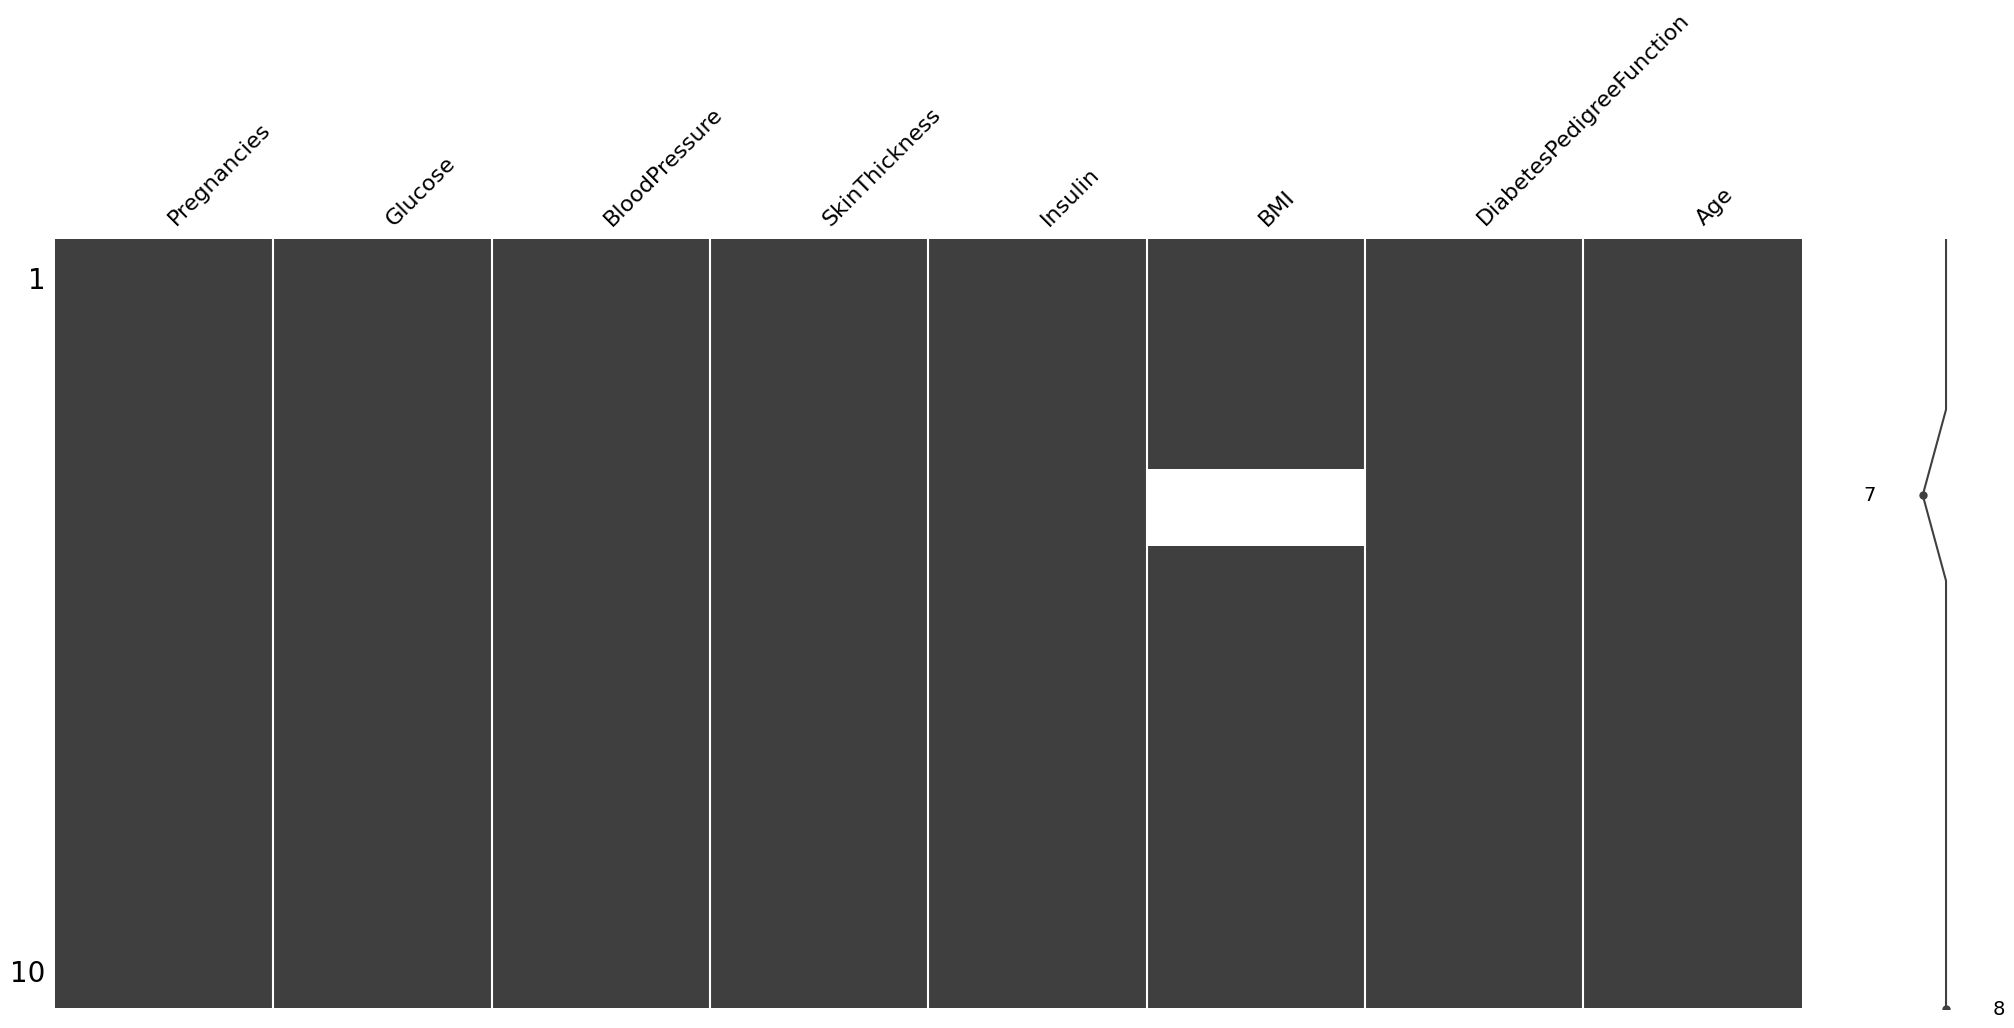

In [14]:
import missingno as msno
%matplotlib inline
msno.matrix(new_patients)

In [15]:
new_patients.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,1
DiabetesPedigreeFunction,0
Age,0


In [16]:
new_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,139,75,0,0,25.6,0.167,29
1,0,180,78,63,14,59.4,2.420,25
2,4,147,74,25,293,34.9,0.385,30
3,0,98,82,15,84,NaN,0.299,22
4,1,107,72,30,82,30.8,0.821,24


In [17]:
new_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               10 non-null     int64  
 1   Glucose                   10 non-null     int64  
 2   BloodPressure             10 non-null     int64  
 3   SkinThickness             10 non-null     int64  
 4   Insulin                   10 non-null     int64  
 5   BMI                       9 non-null      float64
 6   DiabetesPedigreeFunction  10 non-null     float64
 7   Age                       10 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 768.0 bytes


We prefer to fill the missing value with the **averaging strategy**.

In [18]:
new_patients["BMI"].fillna(new_patients["BMI"].mean(), inplace=True)

<ipython-input-18-f2df521158ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_patients["BMI"].fillna(new_patients["BMI"].mean(), inplace=True)


In [19]:
X_scaled = diabetes_scaler.fit_transform(new_patients) # Rescaling data again.

In [20]:
diabetes_model.predict(X_scaled, verbose=0)

array([[0.2594727 ],
       [0.961446  ],
       [0.560199  ],
       [0.03972007],
       [0.0883154 ],
       [0.26961944],
       [0.23231852],
       [0.67376393],
       [0.2865101 ],
       [0.04144972]], dtype=float32)

# **Task 7: The Analysis Results of the Patients are Given Below. How Many of the Predictions Made for 10 Patients are Correct? Comment One by One.**

# **Task 7 Solution**

**Actual diabetes status of patients after the test:** [0, 1, 0, 0, 0, 0, 1, 1, 1, 0]

**The results given by the model are the probability of the relevant class being one. In other words, in this problem, it is the probability of being a diabetic patient.**

* Patient 1:  The model gave the probability of diabetes as 0.2594727. In other words, it predicted that it was not diabetes (0). In reality, it was 0.
* Patient 2:  model 1, reality 1
* Patient 3:  model 1, reality: 0
* Patient 4:  model 0, reality: 0
* Patient 5:  model 0, reality: 0
* Patient 6:  model 0, reality: 0
* Patient 7:  model 0, reality: 1
* Patient 8:  model 1, reality: 1
* Patient 9:  model 0, reality: 1
* Patient 10: model 0, reality: 0

This model correctly classified 7 out of 10 observation units.

# **Exit to Live Systems**

## **Model Deployment**

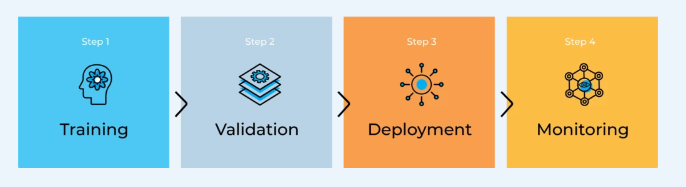

### **1. Preparation of the Model**

The model must be prepared carefully before being released to the live environment. This preparation process begins with the training and evaluation stages to verify that the model works correctly and provides the expected performance. **The accuracy of the model is tested with performance metrics such as error rate and F1 score. If the desired results are not obtained during training and evaluation, the model is re-tuned or improved. At the end of this stage, the model is ensured to be in a usable format.**

The model must be made usable in a format independent of the environment in which it was developed. **During this serialization process, the model may need to be converted to a structure suitable for TensorFlow or PyTorch format.** This step facilitates the portability and integration of the model, allowing it to be used in different environments. Versioning is done to ensure that the model can be updated in the long term. For example, using tools such as MLflow, changes are tracked between different versions of the model and comparisons are made when updates are needed, ensuring that the correct version is put into live.

### **2. Selection of Environment for Model Extraction**

The environment where the model will be extracted should be carefully selected according to the purpose of use, data privacy and user load. **Cloud servers, providers such as AWS, Google Cloud and Microsoft Azure, provide suitable environments for models working with big data thanks to their large-scale and flexible structures.** Cloud platforms also facilitate operational processes with various management and monitoring tools.

### **3. Taking the Model Live**

An API server integration is made to bring the model to life. This integration is usually provided using web frameworks such as Flask, FastAPI or Django.

**Docker is used to make the model portable along with its dependencies and is managed with a platform such as Kubernetes.** Thanks to Kubernetes' automatic scaling, load balancing and fault tolerance features, the model can run smoothly in a live environment.

### **4. Monitoring and Update Processes**

Once the model is live, it needs to be monitored continuously to ensure that it is working properly. Performance metrics such as model accuracy and response time are observed regularly. **Tools such as Prometheus, Grafana or Amazon CloudWatch make it easy to monitor the performance of the model and intervene when necessary.**

**Another important factor affecting the performance of the model is changes in the data distribution. These changes, called "Model Drift" and "Data Drift", may require the model to be updated or retrained.** If the model loses its accuracy over time, it may need to be retrained with new data or another model may need to be used. During updates, the old and new models can be run simultaneously using techniques such as "Blue-Green Deployment" or "Canary Deployment". These techniques ensure a safe transition without affecting the user experience.

### **5. Model Maintenance and Continuous Learning**

**In order for the model to remain effective in the live environment, it must be continuously maintained. At certain intervals or when the model’s performance deteriorates, it needs to be retrained with new data. This process can be managed by automating it with continuous integration and continuous deployment (CI/CD) processes.**

**Automatic MLOps processes can be created to retrain, test, and deploy the model.** MLOps increases the operational efficiency of machine learning models, minimizes manual intervention, and streamlines the model maintenance process. This approach supports functions such as monitoring the model’s performance, continuing to learn with new data, and creating automated pipelines.

### **6. Security and Privacy Measures**

**Bringing the model to life carries security and privacy risks. Therefore, data encryption and secure access should be provided in the environment where the model is running. Secure data transfer and storage mechanisms are applied, especially for models that work on sensitive data.**

Methods such as federated learning or differential privacy can be used for models with privacy risks. Federated learning protects security and privacy, especially on mobile devices, by allowing the model to be trained without sending data to a central server. These techniques provide the information necessary for the model to make accurate predictions while also protecting data privacy.

### **Some Tools and Frameworks Used**

**The tools and frameworks used in the live process increase the operational success and sustainability of the model. MLOps platforms (MLflow, TensorBoard, DVC) provide the necessary infrastructure for monitoring, recording and managing the model. Docker, which packages the model with its dependencies, and Kubernetes, which manages the distribution of these containers, increase the scalability of the model. Cloud services (AWS SageMaker, Google AI Platform, Azure ML) enable models working with large datasets to operate in a flexible and scalable structure. In addition, monitoring tools such as Prometheus, Grafana, CloudWatch ensure the performance and security of the model.**